# How safe are Dog visits to the Dallas Animal Shelter??
# Predictive model the likely hood of Survival of Dog Visit

The purpose of this project is too construct a predictive model on the likely hood of survival of a dog visit to the Dallas Animal Shelter. The historical data was sourced from the Dallas City website for financial year 2020 from period October 2019 to September 2020. The model findings will help dispel the negative consensus of treatment of Dogs by the shelter from general public and restore faith in the animal shelter as safe reputable shelter. Dallas animal shelter is a public funded by local constituents via local tax collected from the Dallas City council. Over the years the shelter have been marginalize for lack of care of Dogs .The model will  would pin point major causes  that exacerbate death  of dogs during visit and help develop a system in place to help mitigate the likely hood of death.

# Libraries Selection

In [21]:
#Install machine learning model interpretability  
!pip install eli5
!pip install shap
!pip install Lime

In [22]:
# Importataion of Libraries 
#We are using several libraries for this predictive model assignment 
#Load EDA pkg
import numpy as np  # linear algebra 
import pandas as pd # manipulation and load of data  
#Load ViZ packages
from matplotlib import pyplot as plt #enable the creation of graphs 
import seaborn as sns #enable the creation of graphs 
import eli5 
from eli5 import show_weights #establish the weight performance 
import shap
import lime
import lime.lime_tabular
#Load ML package 
from sklearn.model_selection import train_test_split # the sole purpose of testing and spliting the data 
from sklearn.linear_model import LogisticRegression # too perform regression
from sklearn.metrics import confusion_matrix # creation of confusion matrix
from sklearn.metrics import classification_report # too ascertain score of classifcation of Data
from sklearn.metrics import roc_curve, roc_auc_score # ability to caluclate (receiver operating characteristics curve)
from sklearn.metrics import accuracy_score # accuracy score of model
from sklearn.ensemble import RandomForestClassifier# Machine learning Technique
import xgboost as xgb ## Machine learning Technique
from sklearn.ensemble import GradientBoostingClassifier #Machine learning Technique
from sklearn.tree import DecisionTreeClassifier # build the decision tree
from sklearn.tree import plot_tree #ability to draw the tree
from sklearn.feature_selection import SelectKBest, chi2 #feature selection

# Import Data

In [23]:
#City of  Dallas Animal Services for the financial year 20220 from the period  October 2019 to September 2020
dog_shelter = pd.read_csv('FY2020_Dallas_Shelter_Dog_Data.csv', parse_dates=['Intake Date','Outcome Date','Intake Time','Outcome Time'] ).copy()

Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.


In [24]:
#get total row and columns of origninal data of dogs which visited the the financial year October 2019 to September 2020
dog_shelter.shape

(22344, 35)

In [25]:
#View first 3 Rows of data 
dog_shelter.head(3)

,Animal Id,Animal Type,Animal Breed,Kennel Number,Kennel Status,Tag Type,Activity Number,Activity Sequence,Source Id,Census Tract,...,Receipt Number,Impound Number,Service Request Number,Outcome Condition,Chip Status,Animal Origin,Additional Information,Month,Year,Dead
0,A0959066,DOG,PIT BULL,LFD 152,LAB,NaN,NaN,1,P0902643,11900,...,NaN,K19-481821,NaN,UNHEALTHY UNTREATABLE NON-CONTAGIOUS,SCAN CHIP,OVER THE COUNTER,NaN,OCT.2019,FY2020,1
1,A0981818,DOG,PIT BULL,FAM GP 04,UNAVAILABLE,NaN,A19-195381,0,P0902654,4000,...,R19-556635,K19-481831,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,PRE ADOPTED,OCT.2019,FY2020,0
2,A1014756,DOG,ROTTWEILER,LFD 116,UNAVAILABLE,NaN,A19-195337,1,P0902611,11800,...,R19-556647,K19-481781,NaN,TREATABLE REHABILITABLE NON-CONTAGIOUS,SCAN CHIP,FIELD,NaN,OCT.2019,FY2020,0


#  Data Preprocessing 

In [26]:
#get descritption of data columns & types . This enable us to view/select the various varaibles to build the predictive model 
dog_shelter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22344 entries, 0 to 22343
Data columns (total 35 columns):
Animal Id                 22344 non-null object
Animal Type               22344 non-null object
Animal Breed              22344 non-null object
Kennel Number             22344 non-null object
Kennel Status             22344 non-null object
Tag Type                  0 non-null float64
Activity Number           13304 non-null object
Activity Sequence         22344 non-null int64
Source Id                 22344 non-null object
Census Tract              18724 non-null object
Council District          18724 non-null object
Intake Type               22344 non-null object
Intake Subtype            22344 non-null object
Intake Total              22344 non-null int64
Reason                    20635 non-null object
Staff Id                  22344 non-null object
Intake Date               22344 non-null datetime64[ns]
Intake Time               22344 non-null datetime64[ns]
Due Out         

In [27]:
##Checking for any missing data values in columns  
dog_shelter.isnull().sum()

Animal Id                     0
Animal Type                   0
Animal Breed                  0
Kennel Number                 0
Kennel Status                 0
Tag Type                  22344
Activity Number            9040
Activity Sequence             0
Source Id                     0
Census Tract               3620
Council District           3620
Intake Type                   0
Intake Subtype                0
Intake Total                  0
Reason                     1709
Staff Id                      0
Intake Date                   0
Intake Time                   0
Due Out                       0
Intake Condition              0
Hold Request               7252
Outcome Type                  0
Outcome Subtype               0
Outcome Date                183
Outcome Time                  0
Receipt Number            12594
Impound Number                0
Service Request Number    22318
Outcome Condition          1878
Chip Status                1709
Animal Origin              1709
Addition

In [28]:
#selection of varibles we deem effective for the sole purpose of predicting the likely hood of survival
columns_to_retain = ['Animal Id','Kennel Number','Staff Id','Animal Breed','Kennel Status','Council District','Intake Type','Hold Request','Reason','Animal Origin','Chip Status','Outcome Subtype','Dead']
dog_shelter_data = dog_shelter.drop([col for col in dog_shelter.columns if not col in columns_to_retain] , axis= 1)

In [29]:
#Checking for any missing data values into the new data frame
dog_shelter_data.isnull().sum()

Animal Id              0
Animal Breed           0
Kennel Number          0
Kennel Status          0
Council District    3620
Intake Type            0
Reason              1709
Staff Id               0
Hold Request        7252
Outcome Subtype        0
Chip Status         1709
Animal Origin       1709
Dead                   0
dtype: int64

In [30]:
#placing missing values into selected columns of newly selected columns we deem effective 
dog_shelter_data = dog_shelter_data.fillna({'Council District':'WEB','Reason':'UNKNOWN','Hold Request':'NOT GIVEN','Animal Origin':'NOT KNOWN','Chip Status': 'NON AVAIL'})

In [31]:
#ReCheck for any missing data values into the new data frame
dog_shelter_data.isnull().sum()

Animal Id           0
Animal Breed        0
Kennel Number       0
Kennel Status       0
Council District    0
Intake Type         0
Reason              0
Staff Id            0
Hold Request        0
Outcome Subtype     0
Chip Status         0
Animal Origin       0
Dead                0
dtype: int64

# Exploratory Data Analysis

Text(0.5, 1.0, 'Total number of Dogs Survived Vs Didnot Survive')

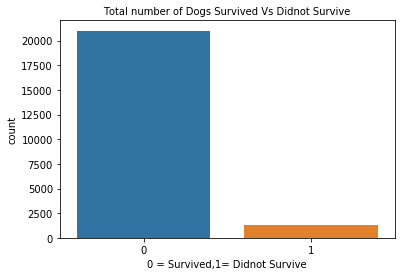

In [32]:
#The total number of Dogs Survived Vs Didnot Survive 
sns.countplot(x='Dead', data=dog_shelter_data)
plt.xlabel('0 = Survived,1= Didnot Survive', fontsize=10)
plt.title('Total number of Dogs Survived Vs Didnot Survive', fontsize=10)

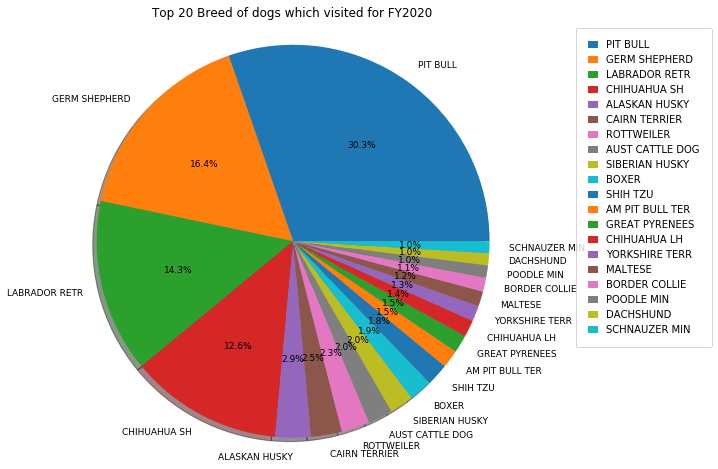

In [33]:
#Top 20 Breed of dogs which visited for FY2020
Dogbreed = dog_shelter_data['Animal Breed'].value_counts().head(20)
plt.figure(figsize=(10, 8))
plt.pie(Dogbreed.values,  labels=Dogbreed.index, autopct='%0.1f%%',shadow=True,textprops={'fontsize':9})
plt.title('Top 20 Breed of dogs which visited for FY2020')
plt.axis('equal')
plt.legend(loc='best',handlelength=1, borderpad=1.2,bbox_to_anchor=(1, 1))
plt.show()

Text(0.5, 0, 'Concil district number')

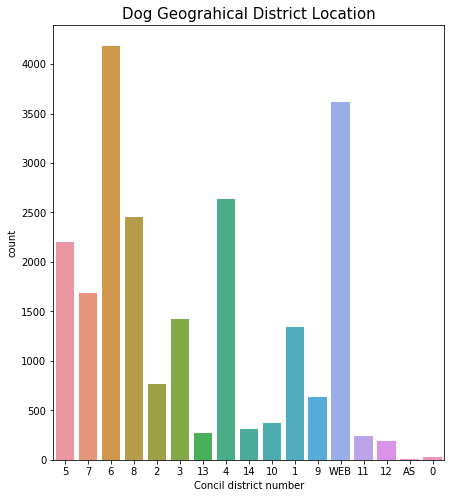

In [34]:
#Examine the Geograhical location from City
plt.figure(figsize=(7, 8))
sns.countplot(x='Council District', data=dog_shelter_data, orient='h')
plt.title('Dog Geograhical District Location', fontsize=15)
plt.xlabel('Concil district number', fontsize=10)

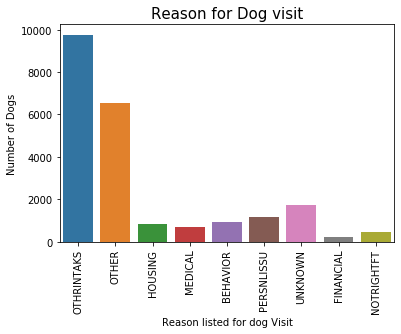

In [35]:
#Reason for Dog visits
sns.countplot(x='Reason', data=dog_shelter_data, orient='v',)
plt.title('Reason for Dog visit', fontsize=15)
plt.xlabel('Reason listed for dog Visit', fontsize=10)
plt.ylabel('Number of Dogs', fontsize=10)
plt.xticks(fontsize=10, rotation='vertical')
plt.yticks(fontsize=10);

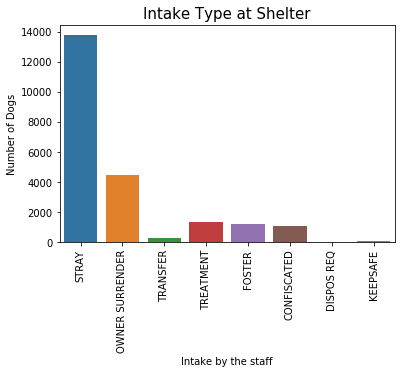

In [36]:
#Intake at shelter 
sns.countplot(x='Intake Type', data=dog_shelter_data, orient='v')
plt.title('Intake Type at Shelter', fontsize=15)
plt.xlabel('Intake by the staff', fontsize=10)
plt.ylabel('Number of Dogs', fontsize=10)
plt.xticks(fontsize=10, rotation='vertical')
plt.yticks(fontsize=10);

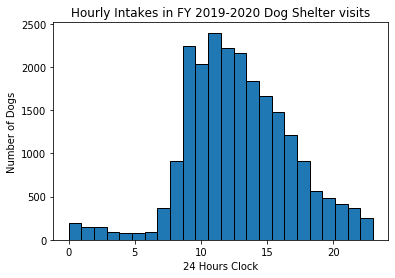

In [37]:
#Time of day the Dallas Animal Shelter saw visits FY 2019-2020 Dog
dog_shelter['hour'] = dog_shelter['Intake Time'].dt.hour
dog_shelter['hour'].plot.hist(bins=24,ec='black')
plt.xlabel('24 Hours Clock')
plt.ylabel('Number of Dogs')
plt.title('Hourly Intakes in FY 2019-2020 Dog Shelter visits')
plt.show()

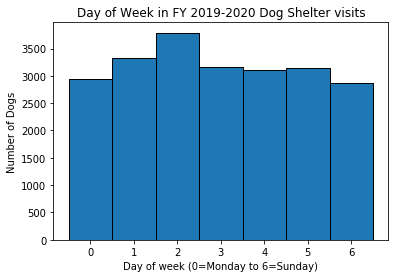

In [38]:
#Day of the week the Dallas Animal Shelter saw visits FY 2019-2020 Dog
dog_shelter['year'] = dog_shelter['Intake Date'].dt.year
dog_shelter['month'] = dog_shelter['Intake Date'].dt.month
dog_shelter['day'] = dog_shelter['Intake Date'].dt.day
dog_shelter['day_of_week'] = dog_shelter['Intake Date'].dt.dayofweek
dog_shelter['day_of_week'].plot.hist(bins=np.arange(8)-0.5, ec='black')
plt.xlabel('Day of week (0=Monday to 6=Sunday)')
plt.ylabel('Number of Dogs')
plt.title('Day of Week in FY 2019-2020 Dog Shelter visits')
plt.show()

# Test for Feature Importance before applying Feature Enginering 

Before applying our model we must test for most important features from the columns we originally chose. This would enable the features with the highest p values be selected for building our model. The K-best functionality from sickit learn library was chosen for this process. K-best was chosen on the sole premise of its quick ability to ascertain best features base on univariate statistical test 

In [39]:
#creating dummy variables
Dog_Data_dummies = pd.get_dummies(dog_shelter_data, columns= ['Animal Breed','Kennel Status','Kennel Number','Council District','Intake Type','Hold Request','Reason','Animal Origin','Staff Id', 'Outcome Subtype','Chip Status'] )

In [40]:
#view data with all dummy varaibles 
Dog_Data_dummies.head(3)

,Animal Id,Dead,Animal Breed_AFFENPINSCHER,Animal Breed_AFGHAN HOUND,Animal Breed_AIREDALE TERR,Animal Breed_AKITA,Animal Breed_ALASK KLEE KAI,Animal Breed_ALASK MALAMUTE,Animal Breed_ALASKAN HUSKY,Animal Breed_AM PIT BULL TER,...,Outcome Subtype_TRANS-INV,Outcome Subtype_TRANSPORT,Outcome Subtype_TREATMENT,Outcome Subtype_UNDERAGE,Outcome Subtype_WALK IN,Outcome Subtype_WESTMORELD,Chip Status_NON AVAIL,Chip Status_SCAN CHIP,Chip Status_SCAN NO CHIP,Chip Status_UNABLE TO SCAN
0,A0959066,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,A0981818,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,A1014756,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [41]:
#Creating a modeling data before applying Featur Engineering 
y = Dog_Data_dummies['Dead']# Survive vs Didn't survive the visit to the Dallas Animal Services
X = Dog_Data_dummies.drop (['Animal Id','Dead'],axis= 1) #we drop the Animal ID and the Dead(not survive) to form the X varaiables

In [42]:
#SELECTION OF TOP PERFORMING FEATURES
skb = SelectKBest(score_func=chi2,k=10)
best_feature_fit = skb.fit(X,y)
best_feature_fit.transform(X)
FEATURE_SCR = pd.DataFrame(best_feature_fit.scores_,columns=['Pvalues_of_FeatureScore'])
feature_column_names =pd.DataFrame(X.columns,columns=['Feature'])
best_feat = pd.concat([FEATURE_SCR,feature_column_names],axis=1)
best_feat.nlargest(30,'Pvalues_of_FeatureScore')

,Pvalues_of_FeatureScore,Feature
190,11989.605803,Kennel Status_LAB
1396,6264.876957,Outcome Subtype_HUMANE
1381,4197.467562,Outcome Subtype_BITE
1380,3599.000473,Outcome Subtype_BEHAVIOR
863,2565.021601,Hold Request_RABIES SPECIMEN
851,2118.377531,Hold Request_EUTH
360,1711.692228,Kennel Number_FREEZER
1413,1299.961969,Outcome Subtype_SPACE
441,1252.975391,Kennel Number_LAB 01
444,1252.975391,Kennel Number_LAB 04


In [43]:
# Top Performing Features 
Newfeatures = Dog_Data_dummies[['Kennel Status_LAB','Outcome Subtype_HUMANE','Outcome Subtype_BITE','Outcome Subtype_BEHAVIOR','Hold Request_RABIES SPECIMEN','Hold Request_EUTH',
                       'Kennel Number_FREEZER','Outcome Subtype_SPACE','Kennel Number_LAB 01','Kennel Number_LAB 04','Kennel Number_LAB 03','Reason_MEDICAL','Kennel Number_LAB 02',
                       'Outcome Subtype_MEDICAL-NONCONTAGIOUS','Outcome Subtype_IN KENNEL','Outcome Subtype_DISPOSAL','Reason_BEHAVIOR','Intake Type_OWNER SURRENDER','Hold Request_RESCU ONLY',
                       'Kennel Status_UNAVAILABLE','Hold Request_ADOP RESCU','Outcome Subtype_WALK IN','Outcome Subtype_DOA','Outcome Subtype_ENROUTE','Hold Request_QUARANTINE','Hold Request_EMERGENCY RESCUE',
                       'Outcome Subtype_DD/AGG','Kennel Number_LAB 15','Outcome Subtype_HOLD','Outcome Subtype_TRANS-INV']]

The top features ascertained from K-best functionality was selected as our new variable for the predictive model 

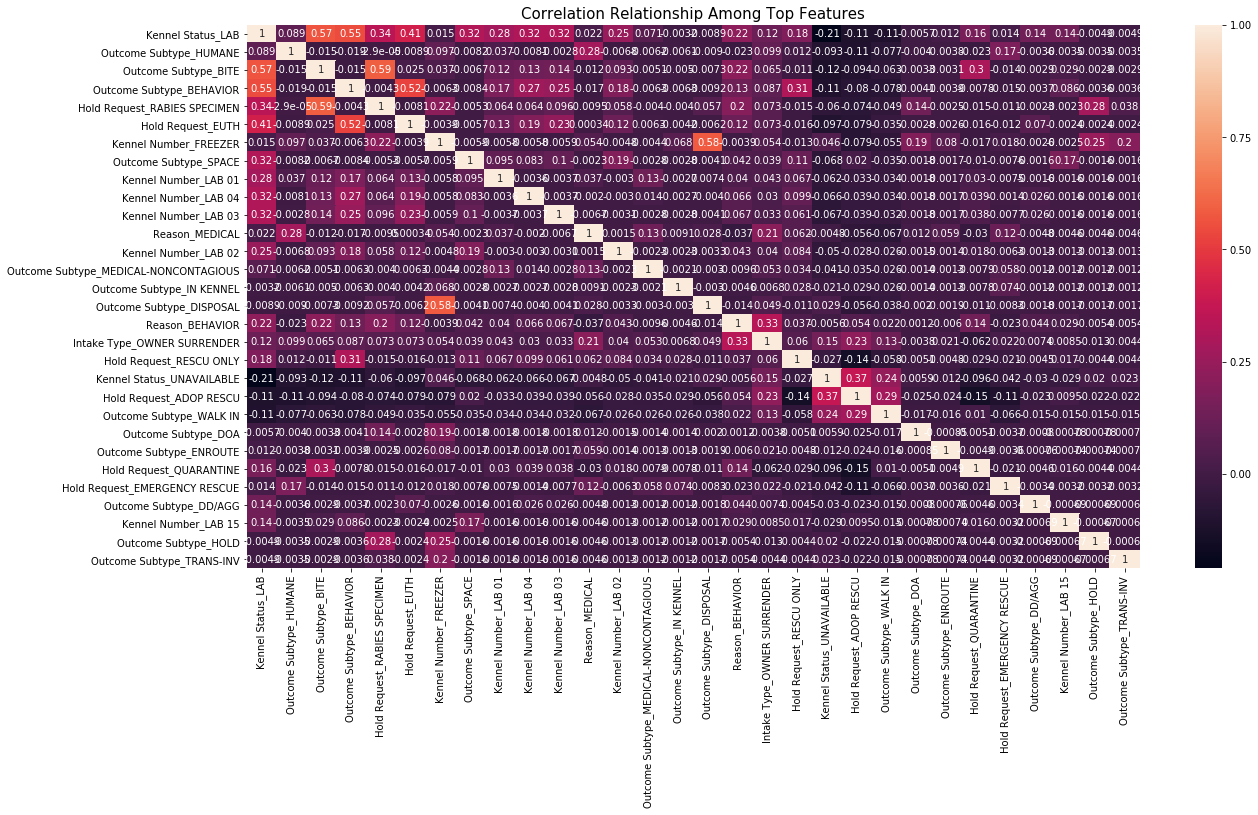

In [44]:
#Correlation Plot 
plt.figure(figsize=(20,10))
sns.heatmap(Newfeatures.corr(),annot=True)
plt.title('Correlation Relationship Among Top Features', fontsize=15)
plt.show()

# Feature Engineering (Measuring Weight of Evidence)

In [45]:
# WoE function for variables
def woe_discrete(df, discrete_variabe_name, target_variable_df):
    df = pd.concat([df[discrete_variabe_name], target_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    return df

In [46]:
#function to plot weight of Evidence
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

divide by zero encountered in log


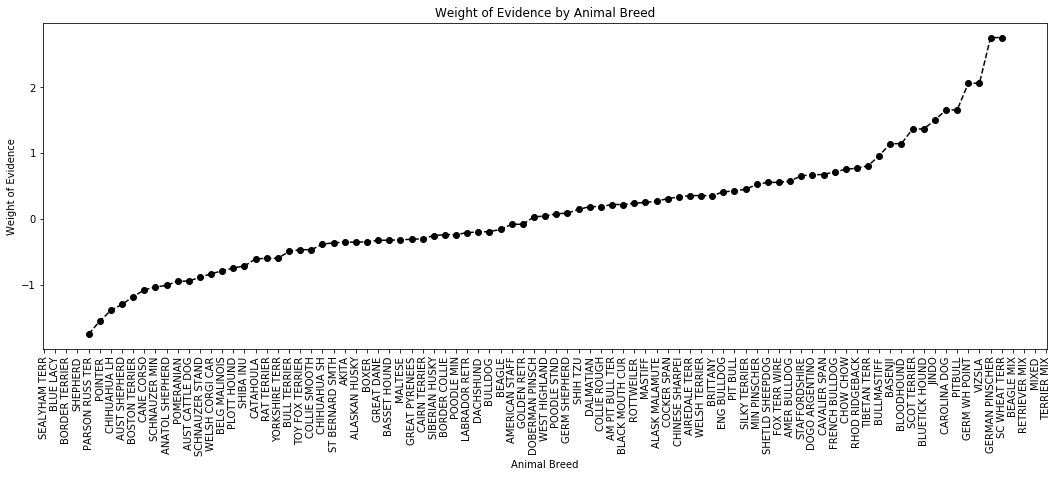

In [47]:
Animal_Breed = woe_discrete(dog_shelter_data, 'Animal Breed', dog_shelter_data['Dead'])
plot_by_woe(Animal_Breed, rotation_of_x_axis_labels = 90)

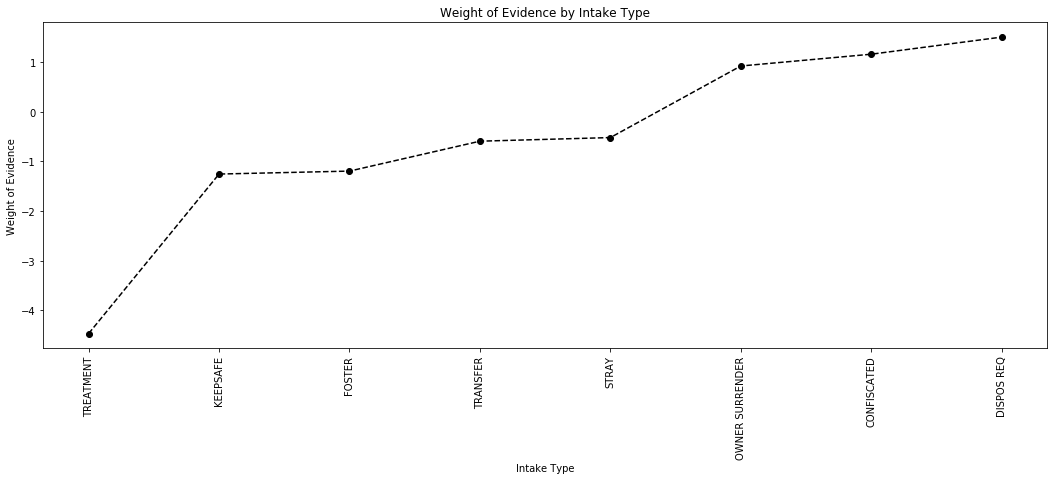

In [48]:
Intaketype = woe_discrete(dog_shelter_data, 'Intake Type', dog_shelter_data['Dead'])
plot_by_woe(Intaketype, rotation_of_x_axis_labels = 90)

divide by zero encountered in log


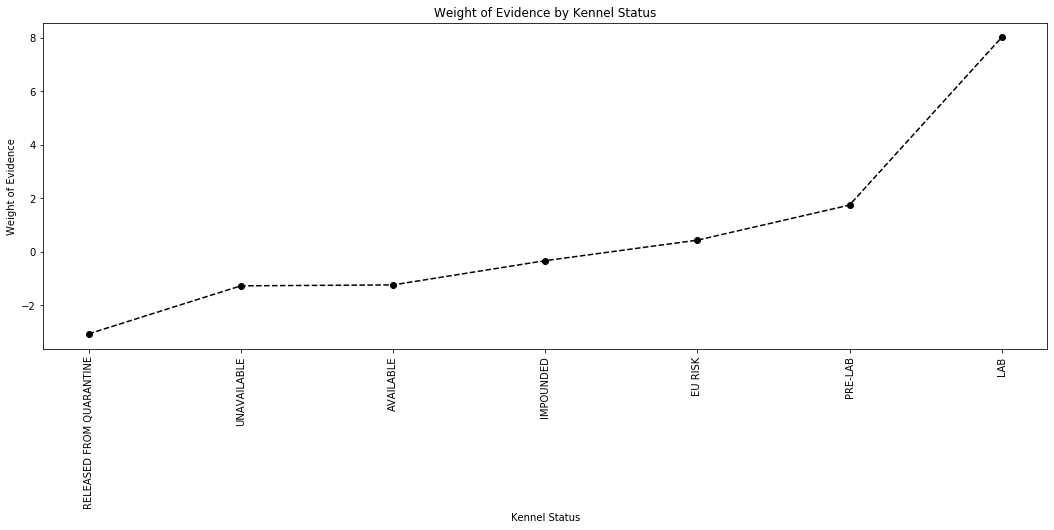

In [49]:
Condition = woe_discrete(dog_shelter_data, 'Kennel Status', dog_shelter_data['Dead'])
plot_by_woe(Condition, rotation_of_x_axis_labels = 90)

divide by zero encountered in log


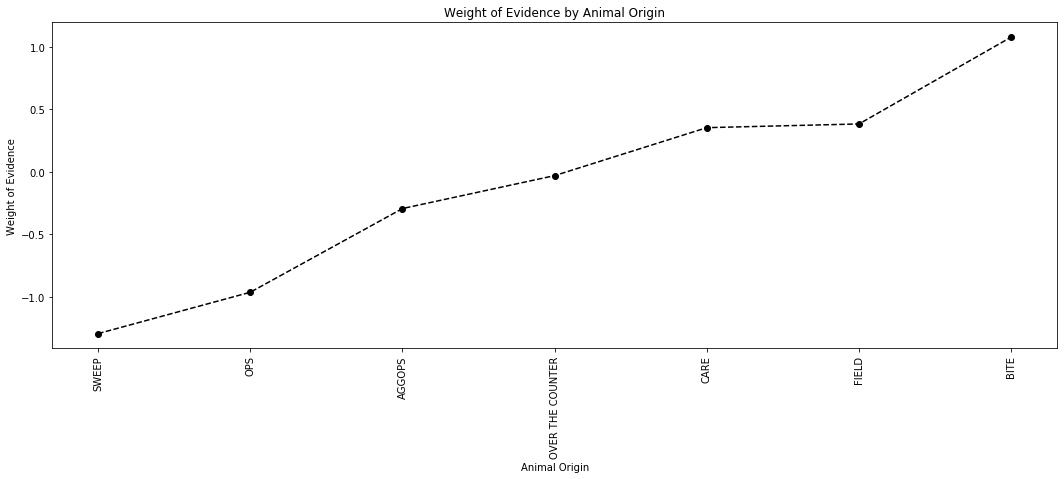

In [50]:
Animal_Origin = woe_discrete(dog_shelter_data, 'Animal Origin', dog_shelter_data['Dead'])
plot_by_woe(Animal_Origin, rotation_of_x_axis_labels = 90)

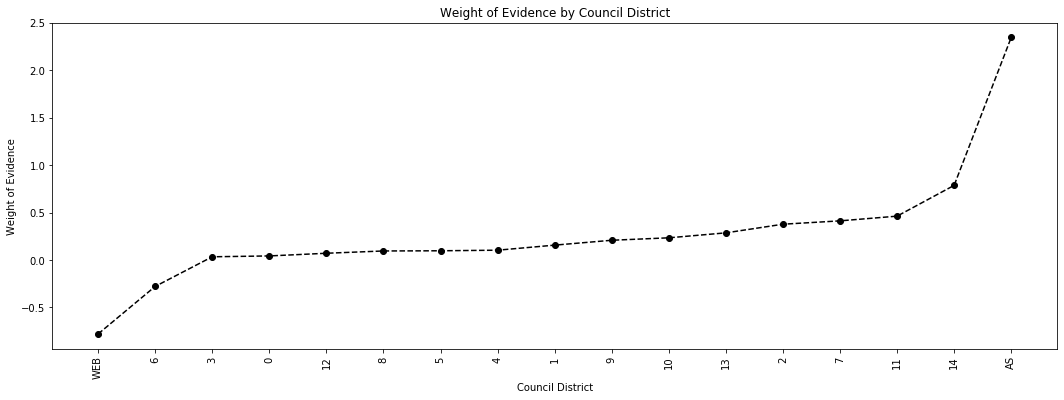

In [51]:
Location = woe_discrete(dog_shelter_data, 'Council District', dog_shelter_data['Dead'])
plot_by_woe(Location, rotation_of_x_axis_labels = 90)

# Feature Engineering New Features


External weather factors may exacerbate the death of dog during transportation to shelter. Hence we will add Dallas weather to our model FY 2019-2020
Does the weather condition during transport of Dogs contribute to  death 


In [52]:
#Dallas weather Average monthly conditions from OCT 2019 to SEPT 2020 sourced from https://www.wunderground.com/history/monthly/us/tx/dallas/KDAL/date/2020-9
weather = pd.read_csv('FY2020_Dallas_Weather.csv').copy()

In [53]:
# editing weather columns  we intend to add to the  predictive model 
weather1 = weather.drop(['Intake Date', 'Month'] , axis= 1)

In [54]:
weather_dummies = pd.get_dummies(weather1, columns= ['Average_Dew_point','Average _Wind','Average_Percipitation','Average_temperature','Average_Gust_Wind '] )

# Train and Tune the model

In [55]:
#Creating a modeling data before applying Featur Engineering 
y1 = Dog_Data_dummies['Dead']# Survive vs Didn't survive the visit to the Dallas Animal Services
X2 = pd.concat([Newfeatures, weather_dummies], axis= 1)

In [56]:
#Spliting the dataset into Training set and Test Set
# I am  using 20% of test and 80% for training 
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2,y1,test_size = 0.2 ,stratify =y , random_state =0)

# Modeling

In [57]:
#Logistic regression 

regressor = LogisticRegression(solver='lbfgs',C=1e5,max_iter=800,random_state=50)
regressor.fit(X_train1,y_train1)

#predictor
y_logmodel = regressor.predict(X_test1)

In [58]:
#get accuracy score of Logistic Regression Score 
print("Accuracy of using Logistic regression is {:.5}".format(accuracy_score(y_test1,y_logmodel)))

Accuracy of using Logistic regression is 0.99866


In [59]:
# Creating the confusion matrix for logistic regression
Roc_matrix = confusion_matrix(y_test1, y_logmodel)

# Assigning columns names
Roc_matrix_df = pd.DataFrame(Roc_matrix, 
            columns = ['Predicted Survived', 'Predicted Not Survived'],
            index = ['Actual Survived', 'Not Survived'])
# Showing the confusion matrix
Roc_matrix_df

,Predicted Survived,Predicted Not Survived
Actual Survived,4199,2
Not Survived,4,264


In [60]:
#Classification report of Logistic Regression
print(classification_report ( y_test1, y_logmodel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4201
           1       0.99      0.99      0.99       268

    accuracy                           1.00      4469
   macro avg       1.00      0.99      0.99      4469
weighted avg       1.00      1.00      1.00      4469



In [61]:
#Run XGBoost on model 
clf_xgb1 = xgb.XGBClassifier( max_depth=4,learning_rate=0.03,n_estimators=500,random_state=50)
clf_xgb1.fit(X_train1,y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=50, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
y_XGBoost = clf_xgb1.predict(X_test1)
#get accuracy score of XGBoost  Score
print("Accuracy of XGBOOST model is {:.5}".format(accuracy_score(y_test1,y_XGBoost)))

Accuracy of XGBOOST model is 0.99776


In [63]:
# Creating the confusion matrix for logistic regression
XGB_matrix = confusion_matrix(y_test1, y_XGBoost)

# Assigning columns names
XGB_matrix_df = pd.DataFrame(XGB_matrix, 
            columns = ['Predicted Survived', 'Predicted Not Survived'],
            index = ['Actual Survived', 'Not Survived'])
# Showing the confusion matrix
XGB_matrix_df

,Predicted Survived,Predicted Not Survived
Actual Survived,4199,2
Not Survived,8,260


In [64]:
#Classification report of XGBOOST
print(classification_report ( y_test1, y_XGBoost))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4201
           1       0.99      0.97      0.98       268

    accuracy                           1.00      4469
   macro avg       1.00      0.98      0.99      4469
weighted avg       1.00      1.00      1.00      4469



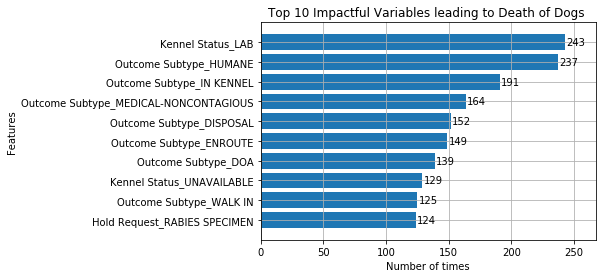

In [65]:
# check for top features via the XGBoost 
xgb.plot_importance(clf_xgb1,height=.8,max_num_features=10, xlabel='Frequency',title='Top 10 Impactful Variables leading to Death of Dogs ')
plt.rcParams['figure.figsize']=[7,7]
plt.show()

In [80]:
show_weights(clf_xgb1)

Weight,Feature
0.3935,Kennel Status_LAB
0.1898,Outcome Subtype_HUMANE
0.1011,Kennel Number_FREEZER
0.0432,Outcome Subtype_IN KENNEL
0.0424,Outcome Subtype_MEDICAL-NONCONTAGIOUS
0.0330,Hold Request_ADOP RESCU
0.0233,Outcome Subtype_ENROUTE
0.0175,Outcome Subtype_DOA
0.0169,Intake Type_OWNER SURRENDER
0.0151,Outcome Subtype_TRANS-INV


In [66]:
#GradientBoosting technique 
GB_classifier = GradientBoostingClassifier(max_depth=4,learning_rate=0.03,n_estimators=500,random_state=50)
GB_classifier.fit(X_train1,y_train1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.03, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=50, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [67]:
y_GBoost = GB_classifier.predict(X_test1)
print("Accuracy of using GradientBoosting model is {:.5}".format(accuracy_score(y_test1,y_GBoost)))

Accuracy of using GradientBoosting model is 0.99843


In [68]:
# Creating the confusion matrix for logistic regression
GBoost_matrix = confusion_matrix(y_test1, y_GBoost)

# Assigning columns names
GBoost_matrix_df = pd.DataFrame(GBoost_matrix, 
            columns = ['Predicted Survived', 'Predicted Not Survived'],
            index = ['Actual Survived', 'Not Survived'])
# Showing the confusion matrix
GBoost_matrix_df

,Predicted Survived,Predicted Not Survived
Actual Survived,4198,3
Not Survived,4,264


In [69]:
#Classification report of GBoost technique
print(classification_report ( y_test1, y_GBoost))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4201
           1       0.99      0.99      0.99       268

    accuracy                           1.00      4469
   macro avg       0.99      0.99      0.99      4469
weighted avg       1.00      1.00      1.00      4469



# Comparisons of Model Scores

In [70]:
print("Accuracy of using Logistic regression is {:.5}".format(accuracy_score(y_test1,y_logmodel)))
print("Accuracy of XGBOOST model is {:.5}".format(accuracy_score(y_test1,y_XGBoost)))
print("Accuracy of using GradientBoosting model is {:.5}".format(accuracy_score(y_test1,y_GBoost)))

Accuracy of using Logistic regression is 0.99866
Accuracy of XGBOOST model is 0.99776
Accuracy of using GradientBoosting model is 0.99843


# Decision Tree 

[Text(871.875, 978.48, 'Kennel Status_LAB <= 0.5\nentropy = 0.113\nsamples = 17875\nvalue = [16802, 1073]\nclass =  Mostlikely_Will_not_Survive'),
 Text(581.25, 761.0400000000001, 'Outcome Subtype_HUMANE <= 0.5\nentropy = 0.052\nsamples = 17257\nvalue = [16800, 457]\nclass =  Mostlikely_Will_not_Survive'),
 Text(465.0, 543.6, 'Kennel Number_FREEZER <= 0.5\nentropy = 0.022\nsamples = 16988\nvalue = [16800, 188]\nclass =  Mostlikely_Will_not_Survive'),
 Text(232.5, 326.1600000000001, 'Outcome Subtype_IN KENNEL <= 0.5\nentropy = 0.012\nsamples = 16858\nvalue = [16756, 102]\nclass =  Mostlikely_Will_not_Survive'),
 Text(116.25, 108.72000000000003, 'entropy = 0.008\nsamples = 16827\nvalue = [16756, 71]\nclass =  Mostlikely_Will_not_Survive'),
 Text(348.75, 108.72000000000003, 'entropy = 0.0\nsamples = 31\nvalue = [0, 31]\nclass =  Yes_Survived'),
 Text(697.5, 326.1600000000001, 'Average _Wind_7.01 <= 0.5\nentropy = 0.448\nsamples = 130\nvalue = [44, 86]\nclass =  Yes_Survived'),
 Text(581.2

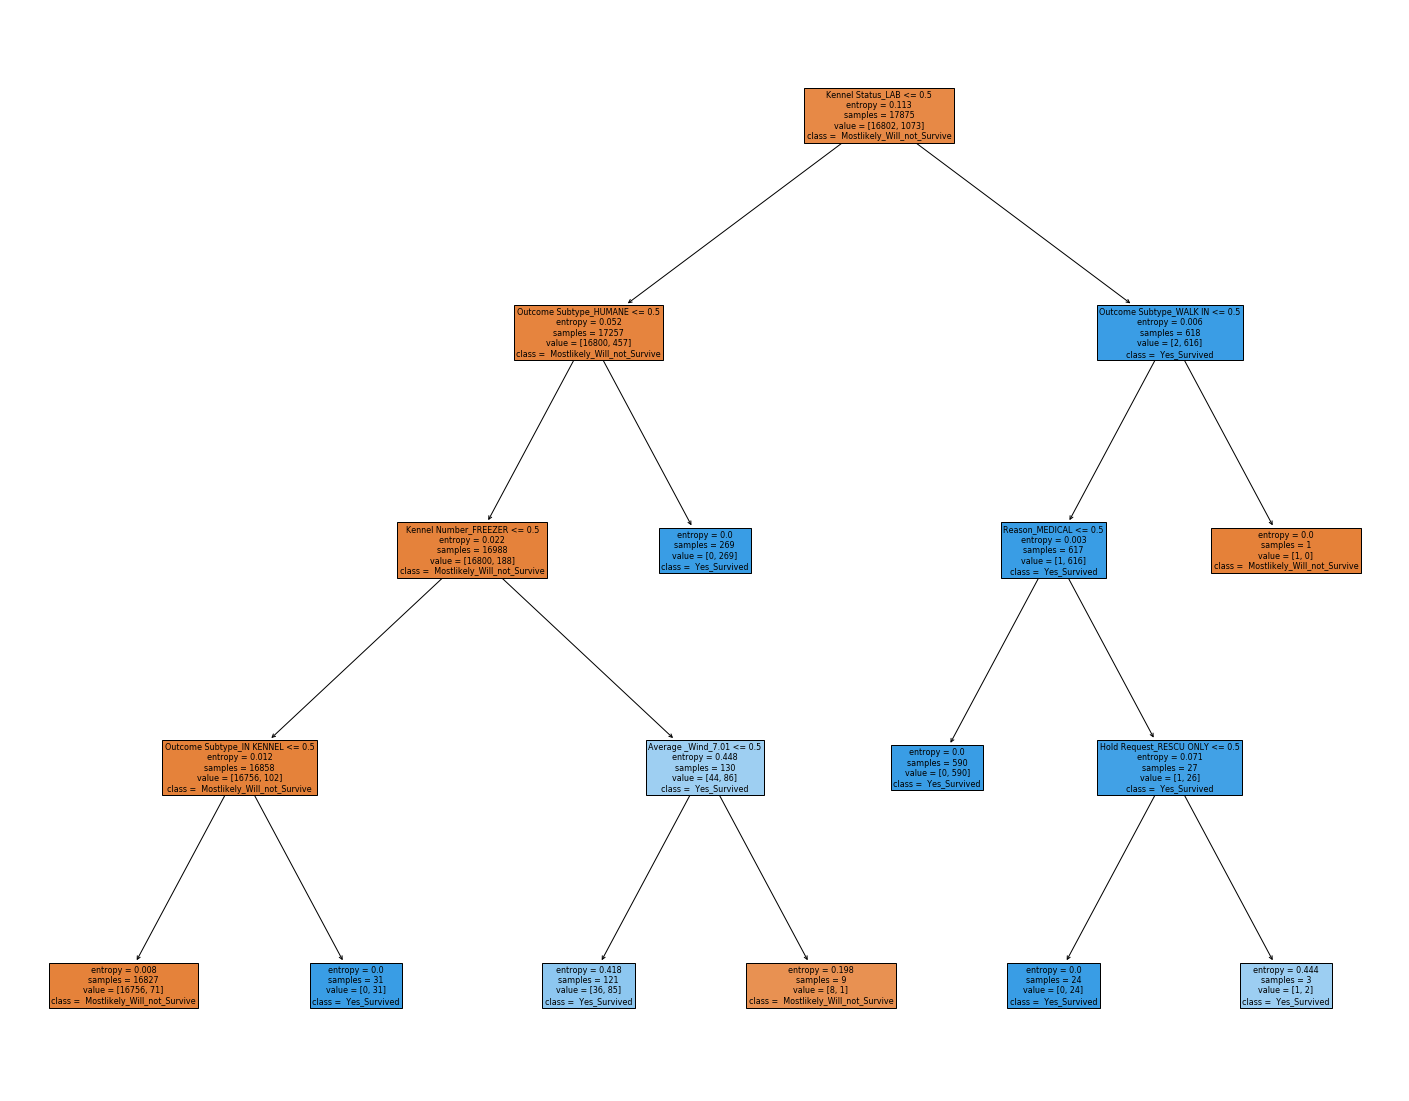

In [71]:
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train1,y_train1)
plt.figure(figsize=(25,20))
plot_tree(clf,filled=True,fontsize=8, class_names=[" Mostlikely_Will_not_Survive" , " Yes_Survived"], feature_names=X_train1.columns)

# ROC Curve (receiver operating characteristics curve)

In [72]:
#random forest
rf = RandomForestClassifier(max_depth=4,n_estimators=500,random_state=50)
rf.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [73]:
#prediction Probabilities
r_probs = [0 for _ in range(len(y_test1))]
rf_probs = rf.predict_proba(X_test1)
nb_probs = rf.predict_proba(X_test1)

rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

r_auc = roc_auc_score(y_test1,r_probs)
rf_auc = roc_auc_score(y_test1, rf_probs)
nb_auc = roc_auc_score (y_test1, nb_probs)

In [74]:
print('Random (Chance) Prediction:AUROC = %.3f' % (r_auc))
print('Random Forest :AUROC = %.3f' % (rf_auc))

Random (Chance) Prediction:AUROC = 0.500
Random Forest :AUROC = 0.998


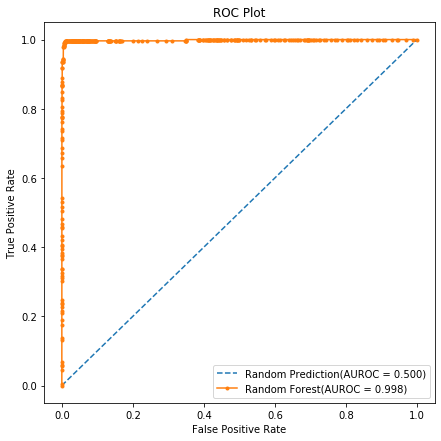

In [75]:
r_fpr,r_tpr, _ = roc_curve(y_test1,r_probs)
rf_fpr,rf_tpr, _ = roc_curve(y_test1,rf_probs)


plt.plot(r_fpr,r_tpr,linestyle='--', label = 'Random Prediction(AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr,rf_tpr, marker='.',   label = 'Random Forest(AUROC = %0.3f)' % rf_auc)


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Model Interpretation – Testing Random Row of model 

In [76]:
#inputs 
cla = [' Survive','Not Survive']

featureName = ['Kennel Status_LAB', 'Outcome Subtype_HUMANE', 'Outcome Subtype_BITE',
       'Outcome Subtype_BEHAVIOR', 'Hold Request_RABIES SPECIMEN',
       'Hold Request_EUTH', 'Kennel Number_FREEZER', 'Outcome Subtype_SPACE',
       'Kennel Number_LAB 01', 'Kennel Number_LAB 04', 'Kennel Number_LAB 03',
       'Reason_MEDICAL', 'Kennel Number_LAB 02',
       'Outcome Subtype_MEDICAL-NONCONTAGIOUS', 'Outcome Subtype_IN KENNEL',
       'Outcome Subtype_DISPOSAL', 'Reason_BEHAVIOR',
       'Intake Type_OWNER SURRENDER', 'Hold Request_RESCU ONLY',
       'Kennel Status_UNAVAILABLE', 'Hold Request_ADOP RESCU',
       'Outcome Subtype_WALK IN', 'Outcome Subtype_DOA',
       'Outcome Subtype_ENROUTE', 'Hold Request_QUARANTINE',
       'Hold Request_EMERGENCY RESCUE', 'Outcome Subtype_DD/AGG',
       'Kennel Number_LAB 15', 'Outcome Subtype_HOLD',
       'Outcome Subtype_TRANS-INV', 'Average_Dew_point_36.89',
       'Average_Dew_point_37.46', 'Average_Dew_point_40.43',
       'Average_Dew_point_41.08', 'Average_Dew_point_50.56',
       'Average_Dew_point_51.15', 'Average_Dew_point_52.93',
       'Average_Dew_point_59.89', 'Average_Dew_point_63.57',
       'Average_Dew_point_63.63', 'Average_Dew_point_65.92',
       'Average_Dew_point_69.95', 'Average _Wind_7.01', 'Average _Wind_7.45',
       'Average _Wind_7.69', 'Average _Wind_7.8', 'Average _Wind_8.35',
       'Average _Wind_8.54', 'Average _Wind_8.85', 'Average _Wind_8.92',
       'Average _Wind_8.99', 'Average _Wind_9.29', 'Average _Wind_9.43',
       'Average _Wind_9.53', 'Average_Percipitation_0.04',
       'Average_Percipitation_0.05', 'Average_Percipitation_0.09',
       'Average_Percipitation_0.11', 'Average_Percipitation_0.12',
       'Average_Percipitation_0.14', 'Average_Percipitation_0.17',
       'Average_Percipitation_0.2', 'Average_Percipitation_0.28',
       'Average_temperature_49.6', 'Average_temperature_50.0',
       'Average_temperature_50.3', 'Average_temperature_53.5',
       'Average_temperature_63.4', 'Average_temperature_64.6',
       'Average_temperature_65.5', 'Average_temperature_73.8',
       'Average_temperature_74.7', 'Average_temperature_81.9',
       'Average_temperature_85.7', 'Average_temperature_86.0',
       'Average_Gust_Wind _2.31', 'Average_Gust_Wind _3.28',
       'Average_Gust_Wind _3.41', 'Average_Gust_Wind _3.89',
       'Average_Gust_Wind _4.08', 'Average_Gust_Wind _5.22',
       'Average_Gust_Wind _5.52', 'Average_Gust_Wind _5.62',
       'Average_Gust_Wind _7.29', 'Average_Gust_Wind _7.44',
       'Average_Gust_Wind _7.48', 'Average_Gust_Wind _8.73']

In [77]:
explainer1=lime.lime_tabular.LimeTabularExplainer(X_train1.values,feature_names=featureName,class_names=cla,discretize_continuous=True)

# Testing Random Row Number 

In [78]:

expl =explainer1.explain_instance(X_test1.iloc[4000],regressor.predict_proba,num_features=15,top_labels=0)


In [79]:
expl.show_in_notebook(show_table=True,show_all=False)